# 🎬 Movie Metadata Analysis with Pandas

This notebook explores and analyzes movie metadata using two datasets: `movies.csv` and `credits.csv`. These datasets contain information about movie titles, genres, overviews, cast, and crew.

By loading and examining the data, we aim to:
- Understand the structure and contents of both datasets
- Prepare the data for further analysis or visualization
- Explore patterns and insights about movie production and casting

This project is a great starting point for anyone interested in data wrangling, merging datasets, and exploring textual and categorical movie metadata.

Let’s begin by importing the necessary libraries and loading our datasets.

# Importing Required Libraries
We begin by importing essential Python libraries for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Datasets

We load two CSV files:
- `credits.csv` contains information about cast and crew
- `movies.csv` includes metadata such as movie titles, overviews, and genres

These datasets will be merged and processed for deeper analysis.

In [3]:
credits =  pd.read_csv("/Users/feliciaangel/Documents/portfolio/movie/data/tmdb_5000_credits.csv")

In [4]:
movies = pd.read_csv("/Users/feliciaangel/Documents/portfolio/movie/data/tmdb_5000_movies.csv")

In [5]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [6]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Renaming Columns for Consistency

To prepare for merging the datasets, we rename the `title` column in the `credits` DataFrame to `movie_title` to match the `movies` DataFrame.
## Checking Dataset Dimensions

We inspect the shape of the original `movies` dataset to understand how many records and features it contains.



In [7]:
credits_updated_df = credits.rename(columns = {"movie_id" : "id"})

In [8]:
movies.shape

(4803, 20)

## Merging Movies and Credits Data

We perform a merge operation to combine `movies` and `credits` into a single DataFrame based on the common `movie_title` column.


In [9]:
movies_df_merge = movies.merge(credits_updated_df, on = "id")

In [10]:
movies_df_merge.shape

(4803, 23)

In [11]:
movies_df_merge.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

## Dropping Unnecessary Columns

To streamline the dataset, we remove redundant or irrelevant columns that are not needed for analysis, such as homepage, tagline, and status.


In [12]:
movies_cleaned_df= movies_df_merge.drop(columns = ['homepage','title_x','title_y','status','production_countries'])

In [13]:
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
C = movies_cleaned_df['vote_average'].mean()

In [14]:
C

6.092171559442016

## Previewing Movie Votes and Averages

We display selected columns (`original_title`, `vote_count`) to review how popular and well-rated movies are.


In [15]:
movies_cleaned_df[['original_title', 'vote_count']]

,original_title,vote_count
0,Avatar,11800
1,Pirates of the Caribbean: At World's End,4500
2,Spectre,4466
3,The Dark Knight Rises,9106
4,John Carter,2124
...,...,...
4798,El Mariachi,238
4799,Newlyweds,5
4800,"Signed, Sealed, Delivered",6
4801,Shanghai Calling,7


## 📈 Visualizing Vote Counts with a Boxplot

use a seaborn boxplot to visually inspect the distribution of `vote_count` values and identify any statistical outliers.


<Axes: xlabel='vote_count'>

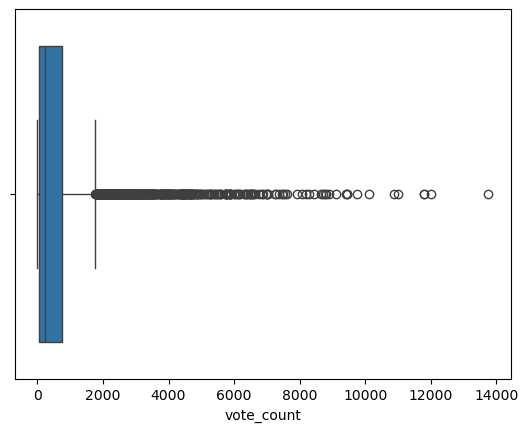

In [16]:
sns.boxplot(data= movies_cleaned_df, x = 'vote_count')

## Filtering by Minimum Vote Threshold

We calculate a threshold `m` using the 90th percentile of `vote_count`. Only movies with votes above this threshold are considered for weighted ranking.


In [17]:
m = movies_cleaned_df['vote_count'].quantile(q=0.9)

In [18]:
filtered_df = movies_cleaned_df[movies_cleaned_df['vote_count']>= m]

## Calculating Weighted Average Ratings

We compute the `weighted_avg` rating using the IMDb formula:
$$
\text{weighted\_avg} = \frac{(v \cdot R) + (m \cdot C)}{v + m}
$$

where:
- `v` = number of votes
- `R` = average rating
- `C` = mean rating across all movies
- `m` = minimum vote threshold


In [19]:
v = filtered_df['vote_count']
R = filtered_df['vote_average']
C = filtered_df['vote_average'].mean()

In [20]:
filtered_df['weighted_avg']=((R*v) +(C*m))/(v+m)

/var/folders/rj/vtldvwnx1yj41h0q0h31rn8w0000gn/T/ipykernel_60116/3843672943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weighted_avg']=((R*v) +(C*m))/(v+m)


## Displaying Top-Ranked Movies

We preview the top movies sorted by their `weighted_avg` scores along with their vote average and count.


In [21]:
df_sorted_ranking = filtered_df.sort_values('weighted_avg', ascending = False).head(20)

In [22]:
df_sorted_ranking[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity']]

,original_title,vote_average,vote_count,weighted_avg,popularity
1881,The Shawshank Redemption,8.5,8205,8.218658,136.747729
662,Fight Club,8.3,9413,8.081543,146.757391
3232,Pulp Fiction,8.3,8428,8.060583,121.463076
3337,The Godfather,8.4,5893,8.058304,143.659698
65,The Dark Knight,8.2,12002,8.035690,187.322927
809,Forrest Gump,8.2,7927,7.967126,138.133331
96,Inception,8.1,13752,7.965926,167.583710
95,Interstellar,8.1,10867,7.935482,724.247784
1990,The Empire Strikes Back,8.2,5879,7.905327,78.517830
1818,Schindler's List,8.3,4329,7.901461,104.469351


In [23]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

## 📊 Visualizing Weighted Ratings

We use a horizontal bar plot to visualize the top movies based on their weighted average ratings.

<Axes: xlabel='weighted_avg', ylabel='original_title'>

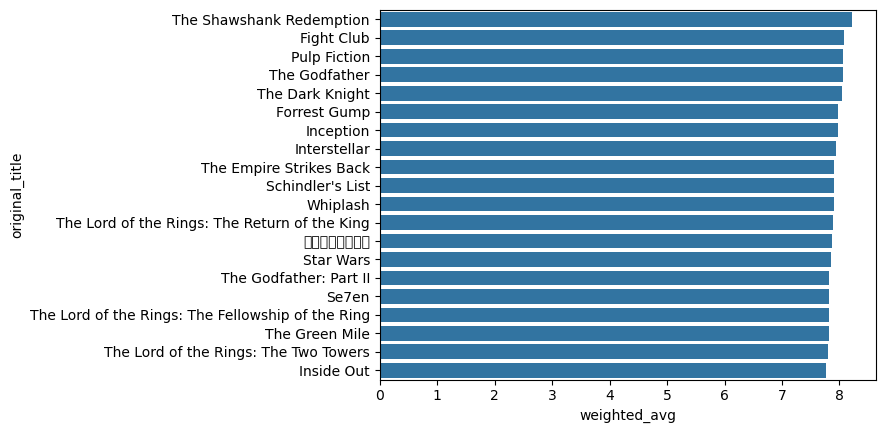

In [24]:
sns.barplot(x = df_sorted_ranking['weighted_avg'], y = df_sorted_ranking['original_title'])

## 📈 Visualizing Popular Movies

We plot a horizontal bar chart of the most popular movies based on the `popularity` score from the dataset.


In [25]:
popularity_df = filtered_df.sort_values('popularity', ascending = False)

<Axes: ylabel='original_title'>

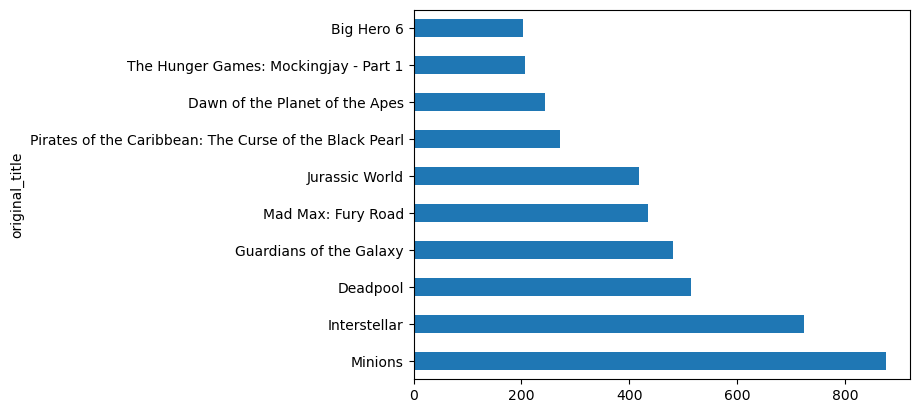

In [26]:
popularity_df.set_index('original_title')['popularity'][0:10].plot.barh()

## Importing Min-Max Scaler

We use `MinMaxScaler` from `sklearn.preprocessing` to normalize the weighted average and popularity scores to a common scale for fair comparison.


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [28]:
scaling_values = scaling.fit_transform(filtered_df[['weighted_avg', 'popularity']])

In [56]:
filtered_df[['weighted_avg_scaled', 'popularity_scaled']] = scaling_values

## Creating a Composite Score

We calculate a new column `score_mix` that combines the scaled weighted average and popularity metrics with equal weight to rank movies more holistically.


In [60]:
filtered_df['score_mix'] = filtered_df['weighted_avg_scaled'] * 0.5 + filtered_df['popularity_scaled'] * 0.5

In [76]:
rank_df = filtered_df.sort_values('score_mix', ascending = False).head(10)

In [78]:
import plotly.express as px

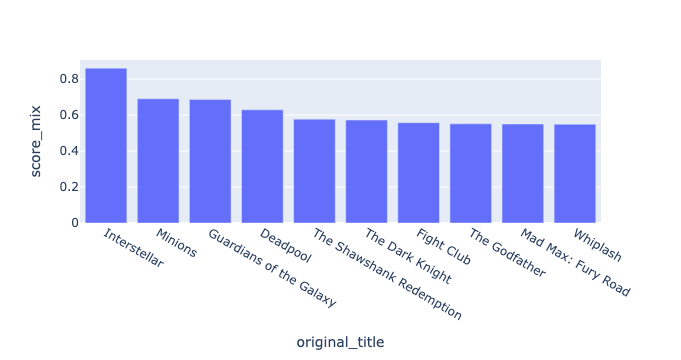

In [80]:
px.bar(data_frame = rank_df, x = 'original_title', y ='score_mix')

# Preparing Data for Text Analysis

We assign `filtered_df` to `data` in preparation for natural language processing on the `overview` column.


In [90]:
data = filtered_df

### Checking for Missing Overviews

We identify how many movies have null entries in the `overview` column, which is important before applying any NLP techniques.


In [92]:
data['overview'].isnull().sum()

0

## Importing TF-IDF Vectorizer

We import `TfidfVectorizer` from `sklearn.feature_extraction.text` to convert movie overviews into numerical vectors based on term importance.


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer



We configure `TfidfVectorizer` with parameters such as `min_df=3` and English stop words removal to convert movie overviews into TF-IDF feature vectors.


In [100]:
tfv = TfidfVectorizer(min_df = 3, 
                max_features=None, 
                ngram_range=(1,3), 
                stop_words = "english")


We fit the TF-IDF vectorizer on the `overview` column and transform the text data into a sparse matrix suitable for similarity computation.


In [102]:
 tfv_matrix = tfv.fit_transform(data['overview'])

## Importing Sigmoid Kernel Function

We import `sigmoid_kernel` from `sklearn.metrics.pairwise` to compute pairwise similarities between movie overviews using a sigmoid-based similarity measure.


In [104]:
from sklearn.metrics.pairwise import sigmoid_kernel


We compute the pairwise similarity scores between all movie overviews using the sigmoid kernel applied to the TF-IDF matrix.


In [108]:
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [112]:
pd.DataFrame(sig)

,0,1,2,3,4,5,6,7,8,9,...,471,472,473,474,475,476,477,478,479,480
0,0.761920,0.761594,0.761594,0.761612,0.761594,0.761609,0.761594,0.761619,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
1,0.761594,0.761920,0.761594,0.761594,0.761623,0.761594,0.761594,0.761609,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761604,0.761594,0.761594,0.761594,0.761594
2,0.761594,0.761594,0.761920,0.761594,0.761594,0.761594,0.761594,0.761608,0.761606,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
3,0.761612,0.761594,0.761594,0.761920,0.761601,0.761597,0.761604,0.761606,0.761604,0.761680,...,0.761594,0.761594,0.761614,0.761603,0.761594,0.761594,0.761601,0.761594,0.761620,0.761594
4,0.761594,0.761623,0.761594,0.761601,0.761920,0.761594,0.761601,0.761618,0.761594,0.761606,...,0.761631,0.761594,0.761594,0.761594,0.761594,0.761610,0.761594,0.761603,0.761605,0.761594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,0.761594,0.761604,0.761594,0.761594,0.761610,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761920,0.761594,0.761594,0.761594,0.761594
477,0.761594,0.761594,0.761594,0.761601,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761615,0.761594,0.761920,0.761594,0.761611,0.761594
478,0.761594,0.761594,0.761594,0.761594,0.761603,0.761607,0.761594,0.761594,0.761594,0.761602,...,0.761643,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761920,0.761605,0.761613
479,0.761594,0.761594,0.761594,0.761620,0.761605,0.761600,0.761610,0.761610,0.761594,0.761621,...,0.761594,0.761594,0.761606,0.761594,0.761594,0.761594,0.761611,0.761605,0.761920,0.761594


## Creating Index Mapping for Titles

We create a `pandas.Series` that maps movie titles to their index values. This allows quick lookup when retrieving similarity scores.


In [116]:
indices = pd.Series(data = data.index, index = data['original_title'])

In [132]:
sigma = sorted(list(enumerate(sig[indices['John Carter']])), key = lambda x : x[1], reverse = True)

In [136]:
ind = [i[0] for i in sigma[0:10]]

In [146]:
dataframe = data.reset_index()

# 🎬 Displaying Recommended Titles

Finally, we use the extracted indices to show the top recommended movies based on content similarity to the selected title.


In [148]:
dataframe['original_title'][ind]

4                                John Carter
76              Independence Day: Resurgence
281                      The Bourne Identity
447                    2001: A Space Odyssey
195                        The Fifth Element
42                X-Men: Days of Future Past
125       Captain America: The First Avenger
71       Captain America: The Winter Soldier
14                              The Avengers
144    The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

# Defining a Recommendation Function

We define a reusable function `give_recommendations(movie_title, model)` that takes a movie title and similarity matrix, and returns a list of recommended movies.


In [154]:
def give_recommendations(movie_title, model):
    indices = pd.Series(data = data.index, index = data['original_title'])
    idx = indices[movie_title]
    model_scores = list(enumerate(model[idx]))
    model_scores_sorted = sorted(model_scores, key = lambda x : x[1], reverse = True)
    model_scores_10 = model_scores_sorted [1:11]
    movie_indices_10 = [i[0] for i in model_scores_10]
    return dataframe['original_title'][movie_indices_10]

In [156]:
give_recommendations('Avatar', sig)

32                       Transformers: Age of Extinction
115                                      Men in Black II
448                           E.T. the Extra-Terrestrial
268                                        Despicable Me
27                                            Iron Man 3
113                                         Ghostbusters
41                                           World War Z
244                                     Independence Day
60                                              Iron Man
143    Pirates of the Caribbean: The Curse of the Bla...
Name: original_title, dtype: object

# Exporting Data and Models

We save the cleaned dataset and export relevant files for future use or deployment. This includes storing the TF-IDF matrix or similarity model using `joblib` or CSV.


In [160]:
import joblib

In [162]:
data.to_csv("/Users/feliciaangel/Documents/portfolio/movie/dumped_obj/movie_data_for_app.csv", index = False)

dataframe.to_csv("/Users/feliciaangel/Documents/portfolio/movie/dumped_obj/movie_dataframe_for_app.csv", index = False)

joblib.dump(tfv,"/Users/feliciaangel/Documents/portfolio/movie/dumped_obj/tfidf_vectorizer.pkl" )

joblib.dump(sig,"/Users/feliciaangel/Documents/portfolio/movie/dumped_obj/sigmoid_kernel.pkl" )

['/Users/feliciaangel/Documents/portfolio/movie/dumped_obj/sigmoid_kernel.pkl']